In [1]:
import math
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats
from my_ecog_utils import read_with_annotations, get_raw_power_bands
from auto_artifact import auto_artifact_from_annot

In [2]:
pts_w_control = [101, 102, 103, 106, 108, 109, 110, 111, 112, 113, 115]
freqs = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']

In [3]:
results_dict_list = []
for pt_num in pts_w_control:
    # this is a misnomer, most of the annotations are automatic but the file names match
    raw = read_with_annotations(pt_num, stim='control', annotations='manual')

    if pt_num == 100:
        raw.rename_channels({'Hip1 - Hip2': 'LHip1 - LHip2', 'Hip3 - Hip4': 'LHip3 - LHip4'})
    elif pt_num == 108:
        raw.rename_channels(lambda s: s.replace('HIP', 'Hip'))
    elif pt_num == 113:
        raw.rename_channels(lambda s: s.replace('H', 'Hip'))

    for chan in raw.ch_names:
        powers = get_raw_power_bands(raw, picks=chan)
        results_dict_list.append({'ID': pt_num, 'Channel': chan, **powers})

results_before_after = pd.DataFrame(results_dict_list, columns=['ID', 'Channel', 'Delta', 'Theta', 'Alpha', 'Beta', 'Gamma'])
results_before_after.to_csv('sham_power.csv', index=False)
results_before_after

Opening raw data file data/101/control_ieeg.fif...
Isotrak not found
    Range : 0 ... 4079 =      0.000 ...    16.316 secs
Ready.
No annotations found for pt 101
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Effective window size : 1.024 (s)
Opening raw data file data/102/control_ieeg.fif...
Isotrak not found
    Range : 0 ... 55367 =      0.000 ...   221.468 secs
Ready.
No annotations found for 

ID        Channel         Delta         Theta         Alpha  \
0   101    LLH1 - LLH2  1.232161e-09  3.020530e-10  7.115491e-11   
1   101    LLH3 - LLH4  2.548065e-09  1.573918e-10  9.197144e-11   
2   101    LMH1 - LMH2  1.091540e-09  2.496965e-10  5.518419e-11   
3   101    LMH3 - LMH4  1.305071e-09  1.521098e-10  5.334159e-11   
4   102  LHip1 - LHip2  8.064019e-11  1.305547e-11  5.196110e-12   
5   102  LHip3 - LHip4  1.103975e-10  2.989487e-11  1.988583e-11   
6   102  RHip1 - RHip2  9.870841e-11  1.704813e-11  8.616513e-12   
7   102  RHip3 - RHip4  1.455429e-10  1.831081e-11  9.025262e-12   
8   103  MIns1 - MIns2  6.034782e-12  6.492580e-12  8.455209e-12   
9   103  MIns3 - MIns4  3.542714e-12  2.845176e-12  3.920970e-12   
10  103  PIns1 - PIns2  1.403729e-10  3.290545e-11  1.767316e-11   
11  103  PIns3 - PIns4  3.284670e-10  1.126851e-10  6.874714e-11   
12  106    lps1 - lps2  1.970883e-12  3.470997e-12  3.437573e-12   
13  106    lps3 - lps4  6.473757e-12  9.601966e-12  8.666603e-12   
14  106  lpih1 - lpih2  2.454542e-11  2.307746e-11  1.758906e-11   
15  106  lpih3 - lpih4  2.985467e-12  4.941069e-12  4.082254e-12   
16  108  LHip1 - LHip2  7.085998e-11  7.628298e-11  4.212515e-11   
17  108  LHip3 - LHip4  2.366903e-11  1.869447e-11  1.075899e-11   
18  108  RHip1 - RHip2  7.904830e-11  2.763788e-11  1.163214e-11   
19  108  RHip3 - RHip4  1.918378e-11  9.267389e-12  6.110567e-12   
20  109  LHip1 - LHip2  1.138763e-09  4.045455e-10  8.794152e-11   
21  109  LHip3 - LHip4  1.840154e-10  1.286996e-10  6.242621e-11   
22  109  RHip1 - RHip2  1.033672e-09  5.609371e-10  1.886728e-10   
23  109  RHip1 - RHip3  6.273705e-10  2.511839e-10  3.978868e-11   
24  110  LHip1 - LHip2  1.990531e-11  1.875831e-11  1.072189e-11   
25  110  LHip3 - LHip4  5.208236e-11  4.562758e-11  4.061134e-11   
26  110  RHip1 - RHip2  3.187319e-11  2.979816e-11  1.726610e-11   
27  110  RHip3 - RHip4  1.964335e-11  2.655829e-11  2.231943e-11   
28  111  LHip1 - LHip2  1.712418e-11  2.939658e-11  1.346716e-11   
29  111  LHip3 - LHip4  1.109588e-11  3.345054e-11  3.788533e-11   
30  111  RHip1 - RHip2  8.270377e-12  1.110333e-11  6.725609e-12   
31  111  RHip3 - RHip4  2.076576e-11  6.194393e-11  2.790868e-11   
32  112  LHip1 - LHip2  6.514627e-11  1.720683e-11  8.876065e-12   
33  112  LHip3 - LHip4  4.512021e-11  4.476910e-11  6.126555e-11   
34  112  RHip1 - RHip2  1.482859e-10  4.326464e-11  2.194539e-11   
35  112  RHip3 - RHip4  1.650850e-10  3.593154e-11  1.559239e-11   
36  113  LHip1 - LHip2  2.398915e-10  1.591977e-10  1.491719e-10   
37  113  LHip3 - LHip4  4.814205e-11  5.772960e-11  3.126367e-11   
38  113  RHip1 - RHip2  5.958384e-10  6.471843e-10  3.202776e-10   
39  113  RHip3 - RHip4  3.713329e-10  4.673053e-10  2.147553e-10   
40  115  LHip1 - LHip2  2.609418e-10  6.292894e-11  3.418602e-11   
41  115  LHip3 - LHip4  7.281549e-11  3.687073e-11  3.158294e-11   
42  115  RHip1 - RHip2  4.212112e-10  9.272505e-11  5.450422e-11   
43  115  RHip3 - RHip4  3.707976e-10  6.667972e-11  3.778461e-11   

            Beta         Gamma  
0   3.200727e-11  3.864874e-12  
1   1.843872e-11  2.663231e-12  
2   1.734291e-11  2.342699e-12  
3   1.561930e-11  2.077378e-12  
4   2.215946e-12  3.632695e-13  
5   1.444156e-11  1.639660e-12  
6   3.393588e-12  5.278734e-13  
7   4.074010e-12  7.001687e-13  
8   2.036424e-12  1.163901e-13  
9   7.636431e-13  7.047252e-14  
10  5.958337e-12  3.645448e-13  
11  3.676651e-11  3.252100e-12  
12  2.982682e-12  9.234663e-13  
13  4.429022e-12  9.317742e-13  
14  9.122847e-12  1.182865e-12  
15  2.250899e-12  6.492282e-13  
16  6.896251e-12  4.286672e-13  
17  4.084847e-12  4.385794e-13  
18  8.285257e-12  9.596840e-13  
19  2.562387e-12  3.109641e-13  
20  2.207096e-11  8.138455e-13  
21  2.017472e-11  7.806391e-13  
22  4.417330e-11  1.407852e-12  
23  8.044748e-12  6.354888e-13  
24  5.222807e-12  3.564607e-13  
25  2.404270e-11  7.120127e-13  
26  9.257452e-12  5.666839e-13  
27  6.352706e-12  8.

In [4]:
memory_delayed = pd.read_csv('memory_delayed.csv').iloc[:,1:]
memory_delayed = memory_delayed.rename({'Memory_Stim': 'Delay_Mem_Stim', 'Memory_Sham': 'Delay_Mem_Sham'}, axis=1)

In [5]:
power_and_mem = results_before_after.merge(memory_delayed, on='ID', how='left')

In [6]:
from stats_pipeline import do_stats

Channel Frequency         r         P
0   LHip1 - LHip2     Delta  0.427174  0.291151
1   LHip1 - LHip2     Theta -0.005667  0.989374
2   LHip1 - LHip2     Alpha  0.032023  0.939998
3   LHip1 - LHip2      Beta  0.085702  0.840093
4   LHip1 - LHip2     Gamma  0.240050  0.566897
5   LHip3 - LHip4     Delta  0.560658  0.148287
6   LHip3 - LHip4     Theta  0.197260  0.639621
7   LHip3 - LHip4     Alpha  0.099920  0.813894
8   LHip3 - LHip4      Beta  0.317547  0.443414
9   LHip3 - LHip4     Gamma  0.307693  0.458455
10  RHip1 - RHip2     Delta  0.632947  0.092095
11  RHip1 - RHip2     Theta  0.391970  0.336865
12  RHip1 - RHip2     Alpha  0.373392  0.362242
13  RHip1 - RHip2      Beta  0.407335  0.316524
14  RHip1 - RHip2     Gamma  0.467840  0.242393
15  RHip3 - RHip4     Delta  0.659376  0.107132
16  RHip3 - RHip4     Theta  0.091116  0.845958
17  RHip3 - RHip4     Alpha  0.036622  0.937871
18  RHip3 - RHip4      Beta  0.085390  0.855566
19  RHip3 - RHip4     Gamma  0.421394  0.346406

Linear regression:


Frequency      Delta  Theta  Alpha  Beta  Gamma
Channel                                        
LHip1 - LHip2    NaN    NaN    NaN   NaN    NaN
LHip3 - LHip4    NaN    NaN    NaN   NaN    NaN
RHip1 - RHip2    NaN    NaN    NaN   NaN    NaN
RHip3 - RHip4    NaN    NaN    NaN   NaN    NaN

Fisher Exact:


Frequency      Delta  Theta  Alpha  Beta  Gamma
Channel                                        
LHip1 - LHip2    NaN    NaN    NaN   NaN    NaN
LHip3 - LHip4    NaN    NaN    NaN   NaN    NaN
RHip1 - RHip2    NaN    NaN    NaN   NaN    NaN
RHip3 - RHip4    NaN    NaN    NaN   NaN    NaN

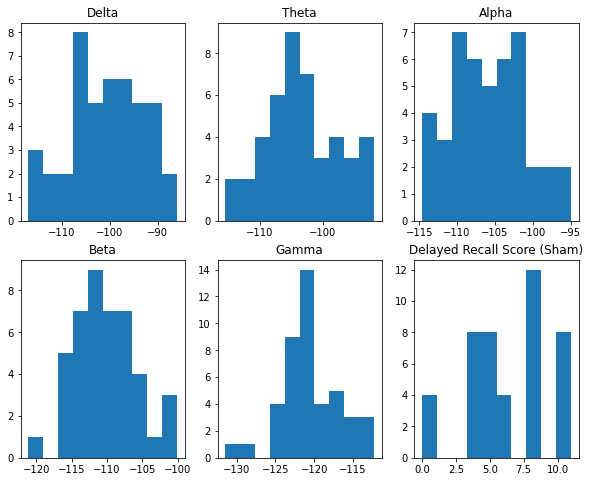

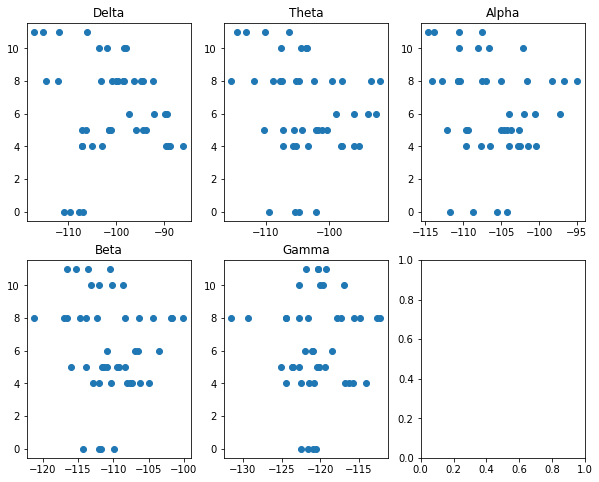

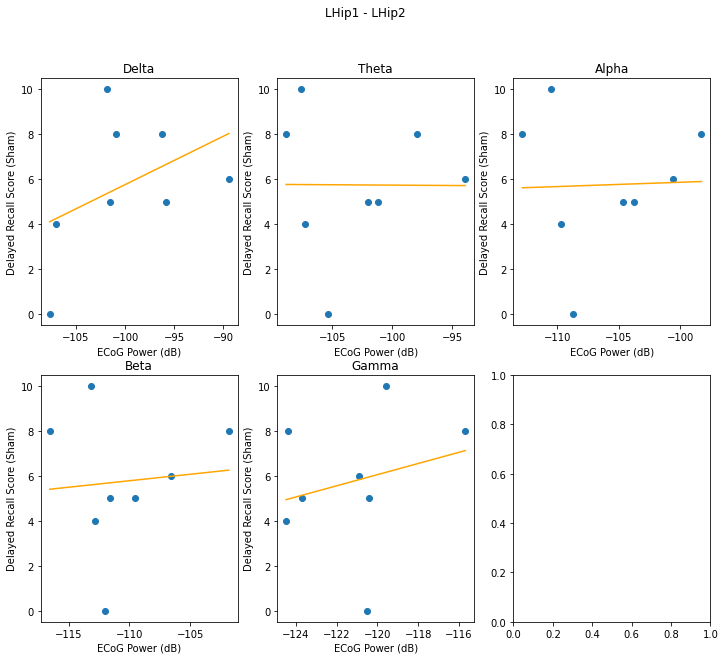

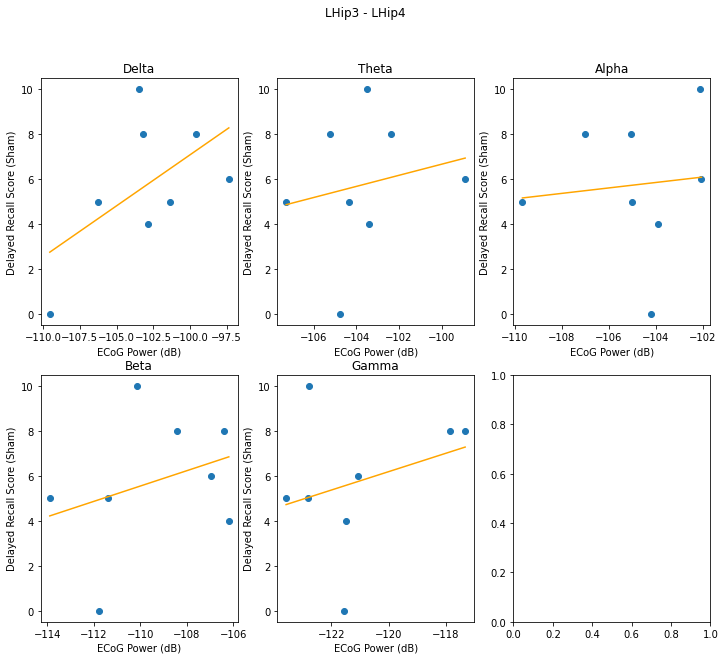

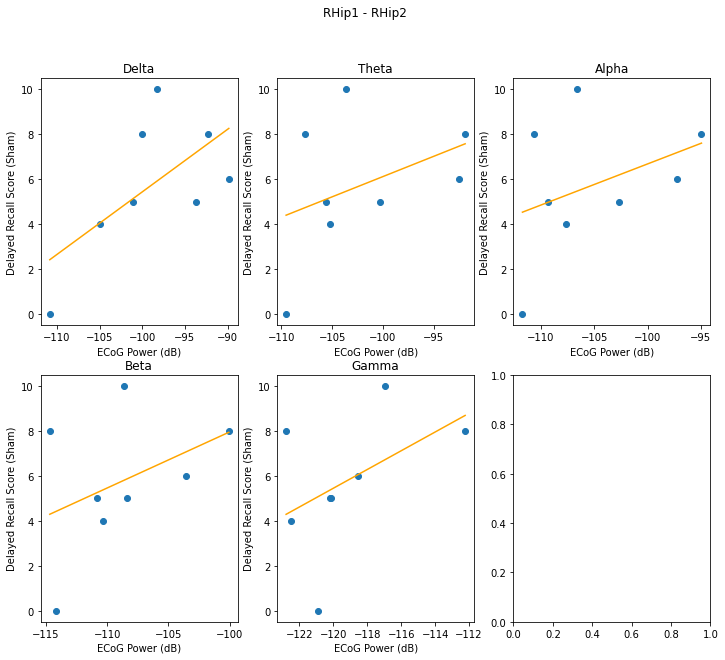

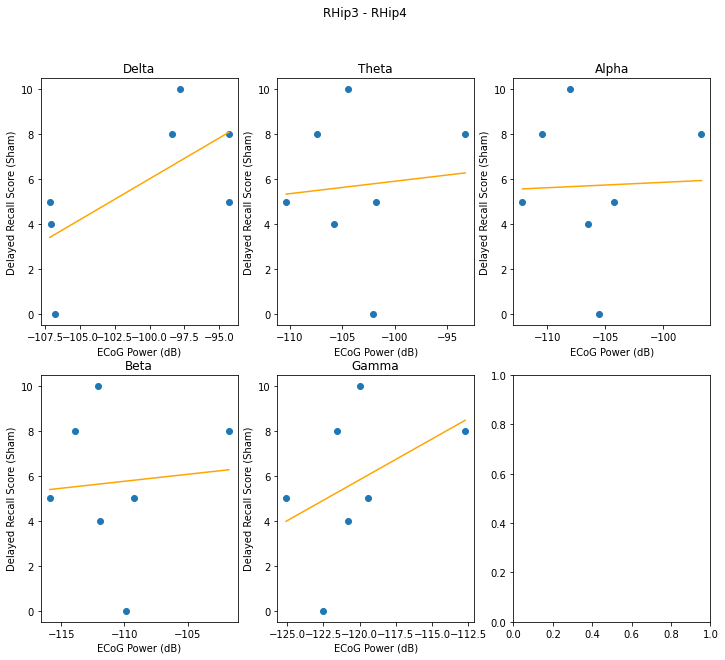

In [7]:
do_stats(power_and_mem, '10 * log($FREQ) / log(10)', 'Delay_Mem_Sham', 'ECoG Power (dB)', 'Delayed Recall Score (Sham)')

The scatter plot for the overall power looked interesting. Maybe I'll try averaging the power across the 4 channels and see where that goes

In [8]:
avg_power = results_before_after.drop('Channel', axis=1).groupby('ID').apply(lambda x: 10 * np.log10(x)).groupby('ID').mean()
avg_power.index = 10 ** (avg_power.index / 10)
avg_power.index = avg_power.index.astype(int)
avg_power

Delta       Theta       Alpha        Beta       Gamma
ID                                                             
101  -88.373621  -96.858413 -101.788154 -106.990593 -115.750560
101  -99.732860 -107.285566 -110.237466 -113.385363 -121.643212
102 -105.015568 -107.910847 -108.487283 -113.669160 -125.030374
106 -112.573000 -111.050442 -111.674392 -113.916497 -120.449840
108 -103.986480 -106.093493 -108.729864 -113.058151 -123.127483
109  -92.167014  -95.336373 -100.962426 -107.001747 -120.613357
109 -105.469248 -105.422973 -106.938010 -110.329156 -122.300531
111 -108.715888 -105.424620 -107.546955 -111.983918 -121.375021
111 -100.357329 -104.804280 -106.825768 -111.004665 -119.833121
112  -96.481422  -96.390090  -98.734506 -102.508353 -114.492639
115  -96.318990 -102.108192 -104.132385 -109.625195 -120.693106

In [9]:
avg_and_mem = avg_power.merge(memory_delayed, right_on='ID', left_index=True)
avg_and_mem

Delta       Theta       Alpha        Beta       Gamma   ID  \
1   -88.373621  -96.858413 -101.788154 -106.990593 -115.750560  101   
1   -99.732860 -107.285566 -110.237466 -113.385363 -121.643212  101   
2  -105.015568 -107.910847 -108.487283 -113.669160 -125.030374  102   
6  -112.573000 -111.050442 -111.674392 -113.916497 -120.449840  106   
8  -103.986480 -106.093493 -108.729864 -113.058151 -123.127483  108   
9   -92.167014  -95.336373 -100.962426 -107.001747 -120.613357  109   
9  -105.469248 -105.422973 -106.938010 -110.329156 -122.300531  109   
11 -108.715888 -105.424620 -107.546955 -111.983918 -121.375021  111   
11 -100.357329 -104.804280 -106.825768 -111.004665 -119.833121  111   
12  -96.481422  -96.390090  -98.734506 -102.508353 -114.492639  112   
14  -96.318990 -102.108192 -104.132385 -109.625195 -120.693106  115   

    Delay_Mem_Stim  Delay_Mem_Sham  
1              4.0               4  
1              4.0               4  
2              7.0               8  
6             12.0              11  
8              6.0               5  
9              6.0               6  
9              6.0               6  
11             8.0               0  
11             8.0               0  
12             9.0              10  
14             4.0               5

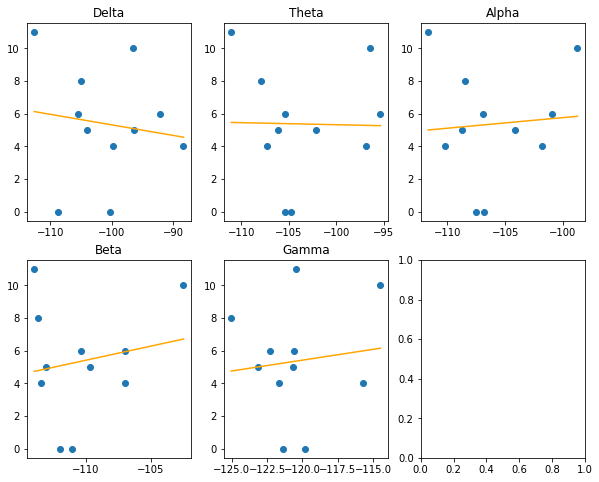

In [10]:
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(10, 8)
for i in range(5):
    freq = freqs[i]
    xs = avg_and_mem[freq]
    ys = avg_and_mem['Delay_Mem_Sham']
    ax[i//3, i%3].scatter(xs, ys)
    ax[i//3, i%3].set_title(freq)
    result = scipy.stats.linregress(xs, ys) # TODO consider quadratic regression
    line_x = np.array([xs.min(), xs.max()])
    ax[i//3, i%3].plot(line_x, result.slope * line_x + result.intercept, c='orange')